In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,Adam
from keras.regularizers import l2
from keras.utils import np_utils,to_categorical
from keras.callbacks import EarlyStopping
from sklearn import metrics
from sklearn import preprocessing

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
import numpy as np
from keras.layers import Dense, InputLayer, Dropout, LSTM
from keras.optimizers import SGD,Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
def get_my_CNN_model_architecture():
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), input_shape=(96,96,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))

    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Convolution2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(8))

    return model

def compile_my_CNN_model(model, optimizer, loss, metrics):
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

def train_my_CNN_model(model, X_train, y_train):
    return model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

def save_my_CNN_model(model, fileName):
    model.save(fileName + '.h5')

def load_my_CNN_model(fileName):
    return load_model(fileName + '.h5')

In [0]:
input_data = np.load('drive/image_train.npy')
output_data = np.load('drive/landmark.npy')
# Load training set
train_x, test_x, train_y, test_y = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

# Setting the CNN architecture
my_model = get_my_CNN_model_architecture()

# Compiling the CNN model with an appropriate optimizer and loss and metrics
compile_my_CNN_model(my_model, optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

# Training the model
hist = train_my_CNN_model(my_model, train_x, train_y)

# Saving the model
save_my_CNN_model(my_model, 'drive/my_model')


Train on 102 samples, validate on 26 samples
Epoch 1/100
102/102 [==============================] - 1s 9ms/step - loss: 2284.1395 - acc: 0.0000e+00 - val_loss: 2235.1851 - val_acc: 0.0000e+00
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 2087.6777 - acc: 0.0000e+00 - val_loss: 1417.4401 - val_acc: 0.0000e+00
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 1033.8170 - acc: 0.0000e+00 - val_loss: 473.3558 - val_acc: 0.0000e+00
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 424.0890 - acc: 0.0000e+00 - val_loss: 373.3983 - val_acc: 0.0000e+00
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 165.8946 - acc: 0.7059 - val_loss: 93.4627 - val_acc: 1.0000
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 124.9443 - acc: 1.0000 - val_loss: 211.5413 - val_acc: 1.0000
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 124.2994 - acc: 1.0000

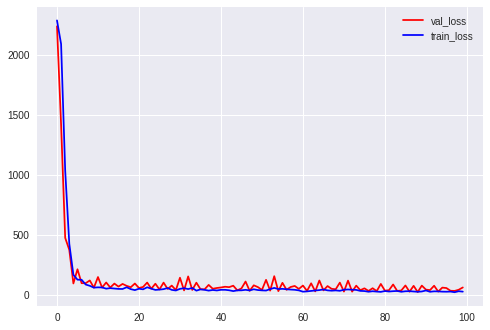

In [0]:
# Intializing Epoch list
t=[]
for i in range(100):
    t.append(i)

# Plotting Validation and training loss VS Epoch
plt.plot(t, hist.history['val_loss'], 'r') # plotting t, a separately 
plt.plot(t, hist.history['loss'], 'b') # plotting t, b separately 
plt.gca().legend(('val_loss','train_loss'))
plt.show()

In [0]:
# Predicting facial point with the model
pre_model = load_my_CNN_model("drive/my_model")
img = plt.imread('drive/81.jpg')/255
tes = np.reshape(img,(1,96,96,3))
coord = pre_model.predict(tes)
jaw_x = coord[0][0] 
jaw_y = coord[0][1]
l_eye_x = coord[0][2]
l_eye_y = coord[0][3]
r_eye_x = coord[0][4]
r_eye_y =  coord[0][5]
head_x =  coord[0][6]
head_y = coord[0][7]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


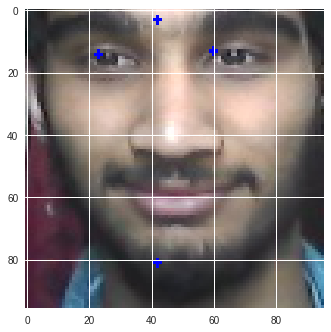

In [11]:
# Showing the points on the input image
cv2.circle(img, (int(jaw_x), int(jaw_y)), 1,(0, 0, 255), -1)
cv2.circle(img, (int(l_eye_x), int(l_eye_y)), 1,(0, 0, 255), -1)
cv2.circle(img, (int(r_eye_x), int(r_eye_y)), 1,(0, 0, 255), -1)
cv2.circle(img, (int(head_x), int(head_y)), 1,(0, 0, 255), -1)
plt.imshow(img)
plt.show()